# Imports

In [1]:
from getdist import loadMCSamples
from getdist import plots
import numpy as np
import matplotlib.pyplot as plt
from classy import Class

# Triplots

In [2]:
lcdm_samples = loadMCSamples('/home/vitor-petri/projects/cobaya/coding/vitor-cobaya-lcdm/chains/lcdm')
fld_samples = loadMCSamples('/home/vitor-petri/projects/cobaya/coding/vitor-cobaya-fld/chains/fld')
int_samples = loadMCSamples('/home/vitor-petri/projects/cobaya/coding/vitor-cobaya-int/chains/int')

p_lcdm = lcdm_samples.getParams()
p_fld = fld_samples.getParams()
p_int = int_samples.getParams()

fld_samples.addDerived(p_fld.w0_fld,'w_0',r'w_0')
fld_samples.addDerived(p_fld.wa_fld,'w_a',r'w_a')

int_samples.addDerived(p_int.w0_int,'w_0',r'w_0')
int_samples.addDerived(p_int.wa_int,'w_a',r'w_a')

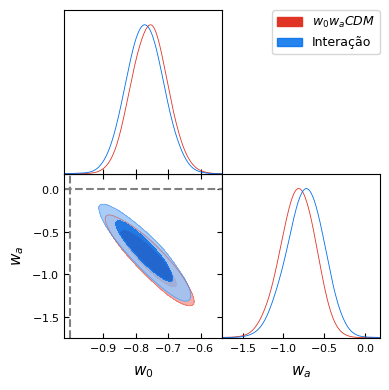

In [3]:
g = plots.getSubplotPlotter()
g.triangle_plot([fld_samples,int_samples], ['w_0','w_a'], 
                filled=True, legend_labels=[r'$w_0w_aCDM$','Interação'])

for i in range(len(g.subplots)):
    for j in range(len(g.subplots[i])):
        ax = g.subplots[i, j]
        if ax is not None and i > j:
            if j == 0:
                ax.axvline(x=-1, color='grey', linestyle='--')
            if i == 1:
                ax.axhline(y=0, color='grey', linestyle='--')

g.export('w0wa.pdf')

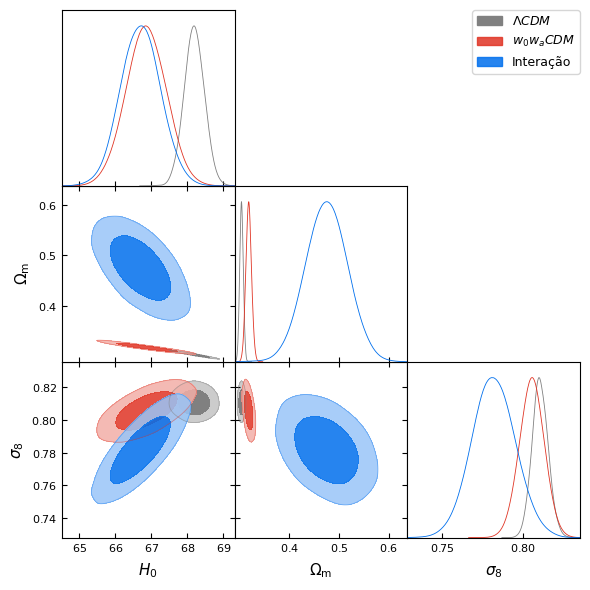

In [4]:
g = plots.getSubplotPlotter()
g.triangle_plot([lcdm_samples,fld_samples,int_samples], ['H0','Omega_m','sigma8'], 
                filled=True, legend_labels=[r'$\Lambda CDM$',r'$w_0w_aCDM$','Interação'])
g.export('triplot.pdf')

# Plots

## Constants

In [ ]:
# verificar os valores dos parametros com o valerio

h0 = 6.8155947E+01/100
omega_b0 = 2.2457804E-02 / (h0**2)
omega_c0 = 1.1844504E-01 / (h0**2)
omega_m0 = 3.0471449E-01
omega_x0 = 6.9520756E-01

h0_bar = 6.7325642E+01/100
omega_b0_bar = 2.2469966E-02 / (h0_bar**2)
omega_c0_bar = 1.1963035E-01 / (h0_bar**2)
omega_m0_bar = 3.1491846E-01
omega_x0_bar = 1 - omega_m0_bar
r0_bar = omega_c0_bar / omega_x0_bar
w0_fld_bestfit = -7.8399734E-01
wa_fld_bestfit = -8.0138038E-01

h0_tilde = 6.6924530E+01 / 100
omega_b0_tilde = 2.2354945E-02 / (h0_tilde**2)
omega_c0_tilde = 1.1907962E-01 / (h0_tilde**2)
omega_m0_tilde = 4.5055629E-01
omega_x0_tilde = 1 - omega_m0_tilde
r0_tilde = omega_c0_tilde / omega_x0_tilde
w0_int_bestfit = -8.0469053E-01
wa_int_bestfit = -6.3298550E-01

# print(omega_m0 - omega_c0 - omega_b0)
# print(omega_m0_bar - omega_c0_bar - omega_b0_bar)             mostrar essas diferenças, talvez neutrinos e radiação
# print(omega_m0_tilde - omega_c0_tilde - omega_b0_tilde)


0.00138666851310882
0.001420992499772615
0.1347760872200471


## Functions

In [24]:
def a(z):
    return 1/(z+1)

def e_square(z):
    return (omega_b0+omega_c0)/a(z)**3+omega_x0

def omega_c(z):
    return (omega_c0/a(z)**3)/e_square(z)

def omega_b(z):
    return (omega_b0/a(z)**3)/e_square(z)

def omega_x(z):
    return omega_x0/e_square(z)

def r(z):
    return omega_c(z)/omega_x(z)

def r_barra(z,w0,wa):
    return r0_bar*np.exp(3*wa*(1-a(z)))*a(z)**(3*(w0+wa))

def e_square_barra(z,w0,wa):
    return (omega_m0_bar) / a(z)**3 + omega_x0_bar * np.exp(3 * wa * (a(z) - 1)) / a(z)**(3 * (1 + w0 + wa))

def omega_c_barra(z,w0,wa):
    return (omega_c0_bar/a(z)**3)/e_square_barra(z,w0,wa)

def omega_b_barra(z,w0,wa):
    return (omega_b0_bar/a(z)**3)/e_square_barra(z,w0,wa)

def omega_m_barra(z,w0,wa):
    return omega_c_barra(z,w0,wa) + omega_b_barra(z,w0,wa)

def r_tilde(z,w0,wa):
    return -(1+w0+wa*(1-a(z))+r_barra(z,w0,wa))/(w0+wa*(1-a(z)))

def ratio(z,w0fld,wafld,w0int,waint):
    return r_barra(z,w0fld,wafld)/r_tilde(z,w0int,waint)

def f_tilde(z,w0,wa):
    return ((3*w0*(1+w0)+wa*(3+6*w0-2*a(z)*(1+3*w0))+3*(wa**2)*(1-a(z))**2)*(r0_bar*a(z)**(3*(w0+wa))+np.exp(-3*wa*(1-a(z)))))\
    /(3*(w0+wa*(1-a(z)))*(r0_bar*a(z)**(3*(w0+wa))+(1+w0+wa*(1-a(z)))*np.exp(-3*wa*(1-a(z)))))

def e_square_tilde(z, w0, wa):
    return omega_m0_tilde / a(z)**3 + omega_x0_tilde / (np.exp(3 * wa * (1 - a(z))) * a(z)**(3 * (1 + w0 + wa)))

def omega_c_tilde(z,w0,wa):
    return ((omega_c0_bar+omega_x0_bar*(1+w0+wa*(1-(1/(z+1))))*np.exp(-3*wa*(1-(1/(z+1))))*(1/(z+1))**(-3*(w0+wa)))*(1/(z+1))**(-3))/e_square_tilde(z,w0,wa)

def omega_x_tilde(z,w0,wa):
    return (-omega_x0_tilde*(w0+wa*(1-(1/(z+1))))*np.exp(-3*wa*(1-(1/(z+1))))*(1/(z+1))**(-3*(1+w0+wa)))/e_square_tilde(z,w0,wa)

def q_tilde(z,w0,wa):
    return f_tilde(z,w0,wa)*3*(h0_tilde*100)*np.sqrt(e_square_tilde(z,w0,wa))*((omega_c_tilde(z,w0,wa)*omega_x_tilde(z,w0,wa))/(omega_c_tilde(z,w0,wa)+omega_x_tilde(z,w0,wa)))

def omega_b_tilde(z,w0,wa):
    return (omega_b0_tilde/((1/(z+1))**3))/e_square_tilde(z,w0,wa)

def omega_m_tilde(z, w0, wa):
    return omega_b_tilde(z,w0,wa) + omega_c_tilde(z,w0,wa)

def fB_tilde(z,w0,wa):
    return omega_b_tilde(z,w0,wa)/omega_m_tilde(z, w0, wa)

def fB_barra(z,w0,wa):
    return omega_b_barra(z,w0,wa)/omega_m_barra(z,w0,wa)

## Lists

In [17]:
z=np.linspace(0,2,20)

w0_int = [] # 7
wa_int = [] # 8
w0_fld=[]
wa_fld=[]

for i in range(1,5):
    path_int = f'/home/vitor-petri/projects/cobaya/coding/vitor-cobaya-int/chains/int.{i}.txt'
    with open(path_int,'r') as int_data:
        lines = int_data.readlines()
        for line in lines[1:]:
            line = line.split()
            w0_int.append(float(line[7]))
            wa_int.append(float(line[8]))

for i in range(1,5):
    path_fld = f'/home/vitor-petri/projects/cobaya/coding/vitor-cobaya-fld/chains/fld.{i}.txt'
    with open(path_fld,'r') as fld_data:
        lines = fld_data.readlines()
        for line in lines[1:]:
            line = line.split()
            w0_fld.append(float(line[7]))
            wa_fld.append(float(line[8]))

## $\bar{r}(z)$, $\tilde{r}(z)$ e $\frac{\bar{r}(z)}{\tilde{r}(z)}$

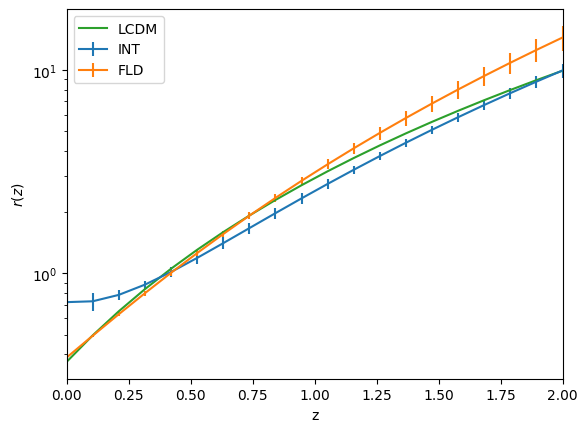

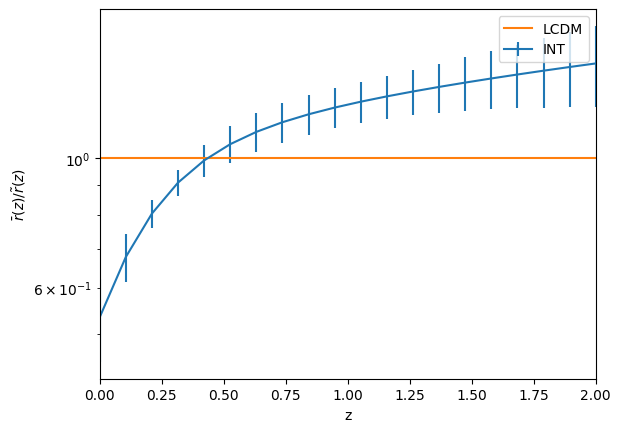

In [19]:
r_tilde_values=[]
r_barra_values=[]
ratio_values=[]

for i in range(len(w0_int)):
    r_tilde_values.append(r_tilde(z,w0_int[i],wa_int[i]))

for i in range(len(w0_fld)):
    r_barra_values.append(r_barra(z,w0_fld[i],wa_fld[i]))
    
for i in range(len(w0_int)):
    ratio_values.append(ratio(z,w0_fld[i],wa_fld[i],w0_int[i],wa_int[i]))

r_barra_std=np.std(r_barra_values,axis=0)
r_tilde_std=np.std(r_tilde_values,axis=0)
ratio_std=np.std(ratio_values,axis=0)

plt.figure(1)
plt.errorbar(z,r_tilde(z,w0_int_bestfit,wa_int_bestfit),yerr=r_tilde_std,label='INT')
plt.errorbar(z,r_barra(z,w0_fld_bestfit,wa_fld_bestfit),yerr=r_barra_std,label='FLD')
plt.plot(z,r(z),label='LCDM')
plt.xlabel('z')
plt.ylabel(r'$r(z)$')
plt.yscale("log")
plt.xlim(0,2)
plt.legend()
plt.savefig('r.pdf')
plt.show()

plt.figure(2)
plt.errorbar(z,ratio(z,w0_fld_bestfit,wa_fld_bestfit,w0_int_bestfit,wa_int_bestfit),yerr=ratio_std,label='INT')
plt.plot(z,r(z)/r(z),label='LCDM')
plt.xlabel('z')
plt.ylabel(r'$\bar{r}(z)/\tilde{r}(z)$')
plt.yscale("log")
plt.xlim(0,2)
plt.legend()
plt.savefig('ratio.pdf')
plt.show()


## $\tilde{f}(z)$

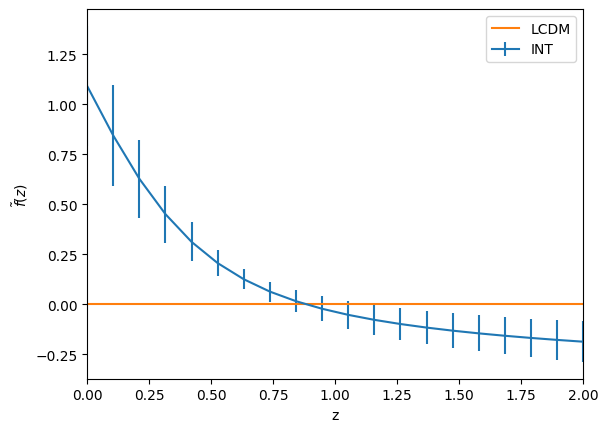

In [20]:
f_tilde_values=[]

for i in range(len(w0_int)):
    f_tilde_values.append(f_tilde(z, w0_int[i], wa_int[i]))

f_tilde_std=np.std(f_tilde_values,axis=0)

plt.errorbar(z,f_tilde(z,w0_int_bestfit,wa_int_bestfit),yerr=f_tilde_std,label='INT')
plt.plot(z,f_tilde(z,-1,0),label='LCDM')
plt.xlabel('z')
plt.ylabel(r'$\tilde{f}(z)$')
plt.xlim(0,2)
plt.legend()
plt.savefig('tilde_f.pdf')

## $\tilde{Q}(z)$

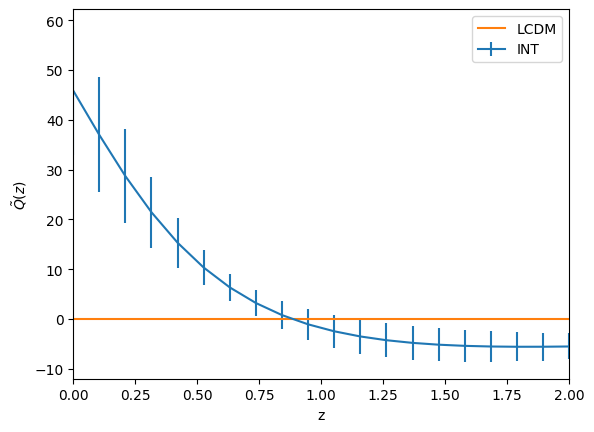

In [21]:
q_tilde_values=[]

for i in range(len(w0_int)):
    q_tilde_values.append(q_tilde(z, w0_int[i], wa_int[i]))

q_tilde_std=np.std(q_tilde_values,axis=0)

plt.errorbar(z,q_tilde(z,w0_int_bestfit,wa_int_bestfit),yerr=q_tilde_std,label='INT')
plt.plot(z,q_tilde(z,-1,0),label='LCDM')
plt.xlabel('z')
plt.ylabel(r'$\tilde{Q}(z)$')
plt.xlim(0,2)
plt.legend()
plt.savefig('tilde_q.pdf')

## $\Omega_m(z)$

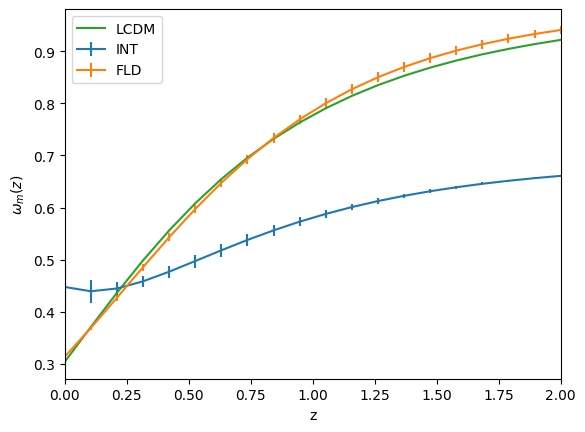

In [22]:
omega_m_tilde_values=[]
omega_m_barra_values=[]

for i in range(len(w0_int)):
    omega_m_tilde_values.append(omega_m_tilde(z, w0_int[i], wa_int[i]))

for i in range(len(w0_fld)):
    omega_m_barra_values.append(omega_b_barra(z, w0_fld[i], wa_fld[i])+omega_c_barra(z, w0_fld[i], wa_fld[i]))

omega_m_tilde_std=np.std(omega_m_tilde_values,axis=0)
omega_m_barra_std=np.std(omega_m_barra_values,axis=0)

plt.errorbar(z,omega_m_tilde(z,w0_int_bestfit,wa_int_bestfit),yerr=omega_m_tilde_std,label='INT')
plt.errorbar(z,omega_b_barra(z,w0_fld_bestfit,wa_fld_bestfit)+omega_c_barra(z,w0_fld_bestfit,wa_fld_bestfit),yerr=omega_m_barra_std,label='FLD')
plt.plot(z,omega_b(z)+omega_c(z),label='LCDM')
plt.xlabel('z')
plt.ylabel(r'$\omega_m(z)$')
plt.xlim(0,2)
plt.legend()
plt.savefig('Om.pdf')

## $f_B(z)$

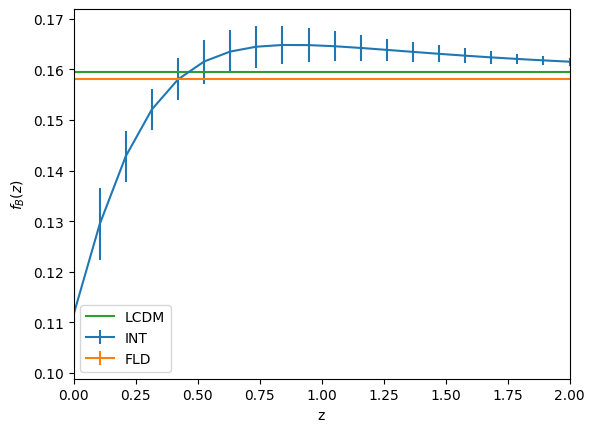

In [25]:
fB_values_int=[]
fB_values_fld=[]

for i in range(len(w0_int)):
    fB_values_int.append(fB_tilde(z, w0_int[i], wa_int[i]))

for i in range(len(w0_fld)):
    fB_values_fld.append(fB_barra(z, w0_fld[i], wa_fld[i]))

fB_tilde_std=np.std(fB_values_int,axis=0)
fB_barra_std=np.std(fB_values_fld,axis=0)

plt.errorbar(z,fB_tilde(z,w0_int_bestfit,wa_int_bestfit),yerr=fB_tilde_std,label='INT')
plt.errorbar(z,fB_barra(z,w0_fld_bestfit,wa_fld_bestfit),yerr=fB_barra_std,label='FLD')
plt.plot(z,omega_b(z)/(omega_b(z)+omega_c(z)),label='LCDM')
plt.xlabel('z')
plt.ylabel(r'$f_B(z)$')
plt.xlim(0,2)
plt.legend()
plt.savefig('fB.pdf')

# Growth function

## Cosmologies

In [ ]:
LCDM = Class()
LCDM.set({'Omega_cdm':0.25,'Omega_b':0.05,
          'z_max_pk':2,
          'output':'tCl,lCl,mPk,mTk','k_output_values':0.05})
LCDM.compute()
bgLCDM=LCDM.get_background()
ptLCDM=LCDM.get_perturbations()['scalar']
transferLCDM=LCDM.get_transfer()

omega_b_lcdm=bgLCDM['(.)rho_b']/bgLCDM['(.)rho_crit']
omega_c_lcdm=bgLCDM['(.)rho_cdm']/bgLCDM['(.)rho_crit']

FLD = Class()
FLD.set({'Omega_cdm':0.25,'Omega_b':0.05,'Omega_Lambda':0,'w0_fld':w0_fld_bestfit,'wa_fld':wa_fld_bestfit,'z_max_pk':2,'output':'tCl,lCl,mPk,mTk','k_output_values':0.05})
FLD.compute()
bgFLD=FLD.get_background()
ptFLD=FLD.get_perturbations()['scalar']
transferFLD=FLD.get_transfer()

omega_b_fld=bgFLD['(.)rho_b']/bgFLD['(.)rho_crit']
omega_c_fld=bgFLD['(.)rho_cdm']/bgFLD['(.)rho_crit']

